In [33]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline


In [34]:
df = pd.read_csv('email_spam_svm.csv')

In [35]:
df.isna().sum()

word_freq_free     0
word_freq_money    0
word_freq_offer    0
email_length       0
is_spam            0
dtype: int64

In [36]:
df.columns

Index(['word_freq_free', 'word_freq_money', 'word_freq_offer', 'email_length',
       'is_spam'],
      dtype='object')

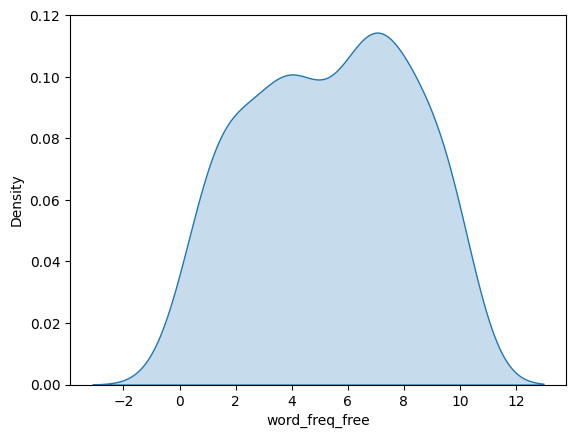

In [37]:
sns.kdeplot(x=df['word_freq_free'],fill=True)
plt.show()

<Axes: xlabel='word_freq_money', ylabel='Density'>

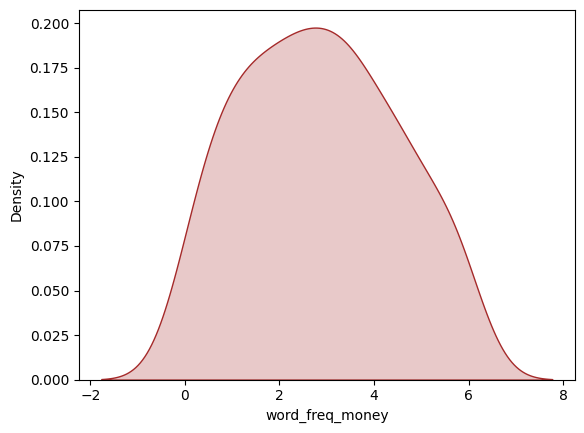

In [38]:
sns.kdeplot(x = df['word_freq_money'] , fill = True , color = 'brown')

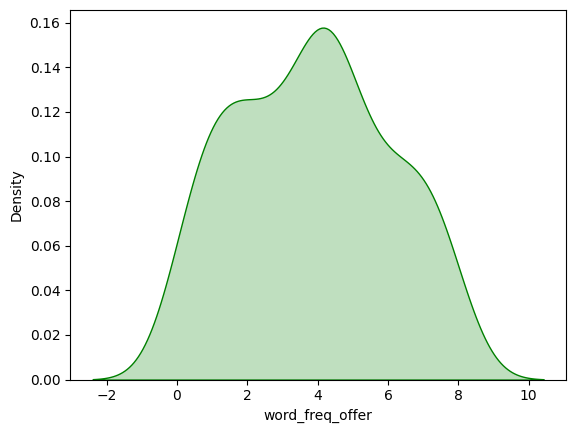

In [39]:
sns.kdeplot(x = df['word_freq_offer'] , fill = True , color = 'green')
plt.show()

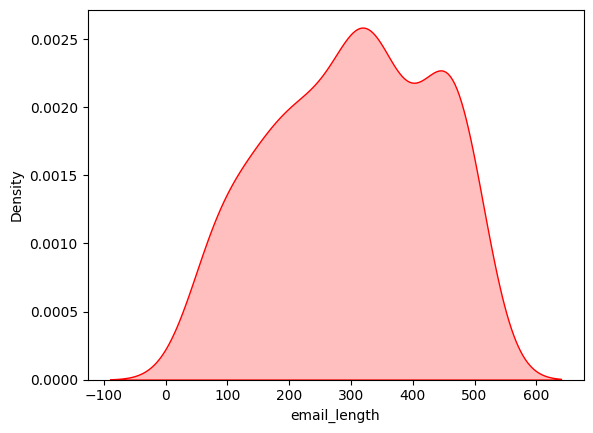

In [40]:
sns.kdeplot(x = df['email_length'] , fill = True , color = 'red')
plt.show()

In [41]:
x= df[['word_freq_free','word_freq_money','word_freq_offer','email_length']]
y = df['is_spam']




In [42]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

pipeline.fit(x, y)

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy')


rocauc_scores = cross_val_score(
    pipeline, x, y, cv=cv, scoring="roc_auc"
)

print("Mean Accuracy:", accuracy_scores.mean())
print("Mean ROC-AUC:", rocauc_scores.mean())


Mean Accuracy: 0.9733285917496444
Mean ROC-AUC: 0.9930555555555556


In [43]:

pipeline.fit(x, y)

new_email = pd.DataFrame([[2.1, 1.3, 0.7, 180]], 
                         columns=['word_freq_free','word_freq_money','word_freq_offer','email_length'])


prediction = pipeline.predict(new_email)[0]
probability = pipeline.predict_proba(new_email)[0][1]

print("New Email Prediction ->", "Spam" if prediction==1 else "Not Spam")
print("Probability of Spam:", probability)


New Email Prediction -> Spam
Probability of Spam: 0.1732430874146346
